In [ ]:
# ✅ 1. Mount Google Drive to access LoRA weights
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ✅ 2. Install dependencies
!pip install -q diffusers transformers accelerate safetensors opencv-python
!pip install -q git+https://github.com/tencent-ailab/IP-Adapter.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# ✅ 3. Import libraries
import sys
sys.path.append("/content/IP-Adapter/")

import torch
import os
from PIL import Image
from torchvision import transforms
from diffusers import StableDiffusionPipeline
from ip_adapter import IPAdapter
from IPython.display import display


In [ ]:
# ✅ 4. Load base SD 1.5 model with LoRA weights
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16
).to("cuda")
pipe.safety_checker = None

# ✅ Load LoRA weights trained on beachybeach identity from Google Drive
pipe.load_lora_weights("/content/drive/MyDrive/data/datasets/beachybeach_lora_model/")
# Optional: fuse LoRA into base weights (permanently applies it)
# pipe.fuse_lora()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Clone IP-Adapter FaceID model repo from Hugging Face
!git lfs install
!git clone https://huggingface.co/h94/IP-Adapter-FaceID

Git LFS initialized.
Cloning into 'IP-Adapter-FaceID'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 125 (delta 54), reused 0 (delta 0), pack-reused 3 (from 1)
Receiving objects: 100% (125/125), 863.73 KiB | 12.52 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Filtering content: 100% (18/18), 5.37 GiB | 35.04 MiB/s, done.


In [ ]:
# ✅ 5. Load IP-Adapter for identity guidance
# ✅ Download prebuilt IP-Adapter model
from ip_adapter.ip_adapter_faceid import IPAdapterFaceID


ip_adapter = IPAdapterFaceID(
    pipe,
    "/content/IP-Adapter-FaceID/ip-adapter-faceid_sd15.bin",
    "cuda"
)

/usr/local/lib/python3.11/dist-packages/diffusers/models/lora.py:208: FutureWarning: `LoRALinearLayer` is deprecated and will be removed in version 1.0.0. Use of `LoRALinearLayer` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRALinearLayer", "1.0.0", deprecation_message)


In [ ]:
!pip install insightface onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 12.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.4 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1057600 sha256=a16a576a387bf96d6fa37c8f80c10d62d66f850d151c9a575968c2e014fad421
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [ ]:
import os
print(os.listdir("/content/IP-Adapter-FaceID"))

['ip-adapter-faceid_sdxl_lora.safetensors', 'faceid_plusv2.jpg', 'ip-adapter-faceid-portrait-v11_sd15.bin', 'ip-adapter-faceid-portrait_sd15.bin', 'README.md', 'ip-adapter-faceid.jpg', 'ip-adapter-faceid-plus_sd15.bin', 'faceid_portrait_sd15.jpg', 'ip-adapter-faceid-portrait_sdxl.bin', 'ip-adapter-faceid-portrait_sdxl_unnorm.bin', 'ip-adapter-faceid_sd15_lora.safetensors', 'ip-adapter-faceid-plus_sd15_lora.safetensors', 'sdxl_faceid.jpg', 'ip-adapter-faceid_sd15.bin', 'ip-adapter-faceid-plusv2_sd15_lora.safetensors', '.gitattributes', 'faceid-plus.jpg', 'ip-adapter-faceid-plusv2_sd15.bin', 'ip-adapter-faceid-plusv2_sdxl.bin', 'ip-adapter-faceid_sdxl.bin', '.git', 'ip-adapter-faceid-plusv2_sdxl_lora.safetensors']


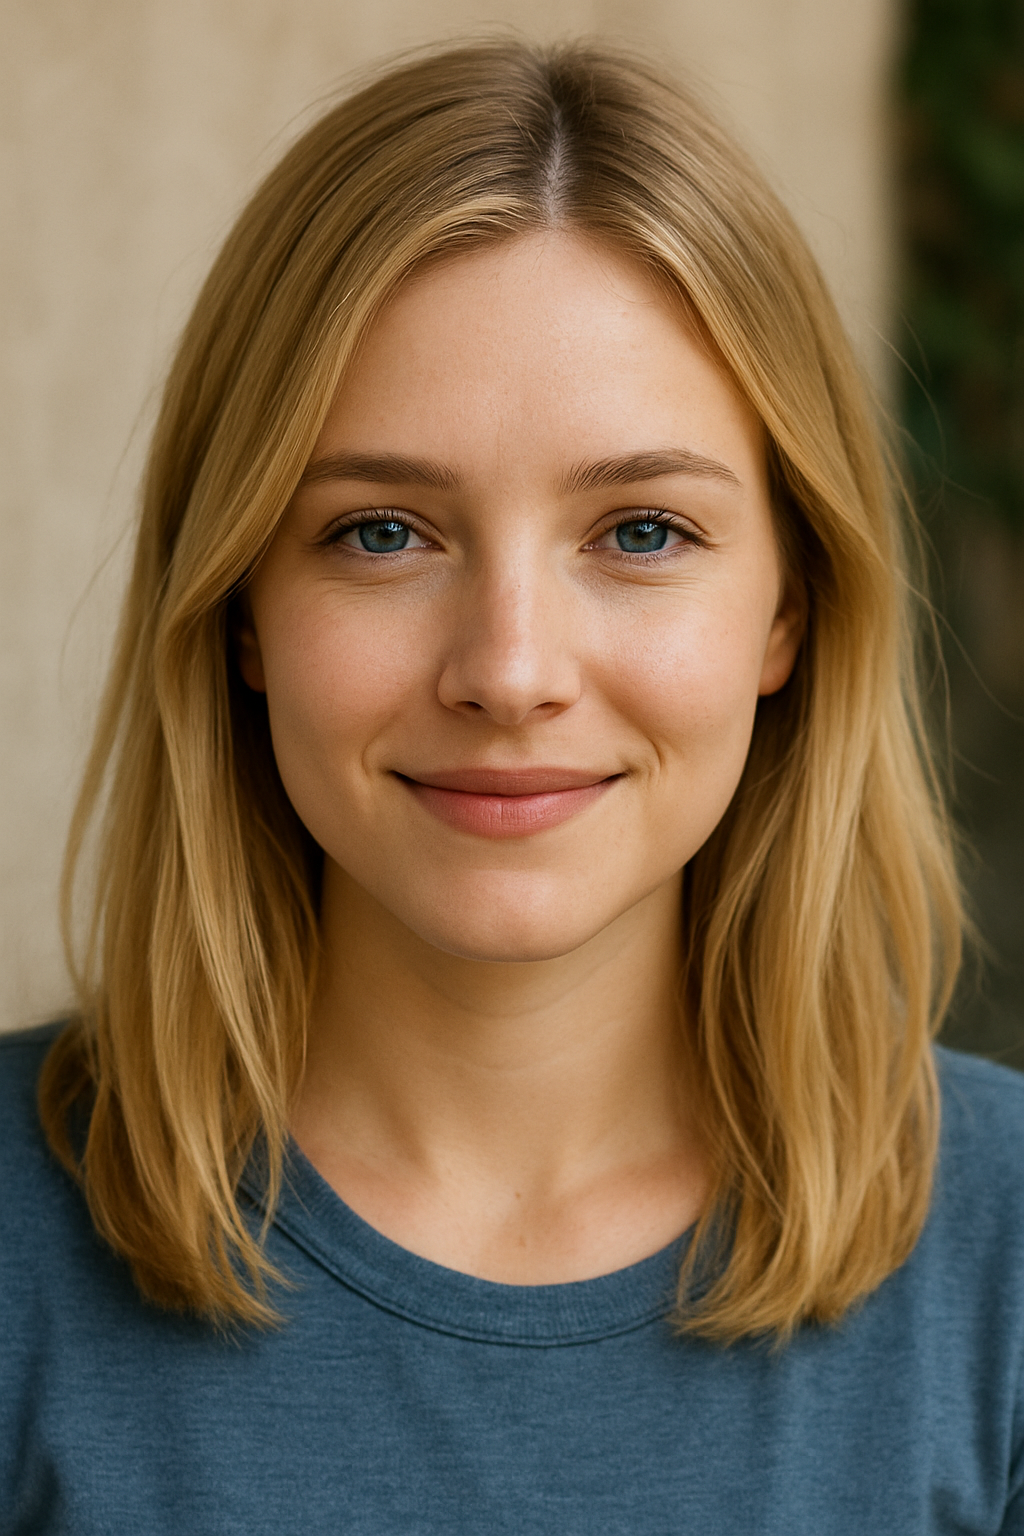

In [ ]:
# ✅ 6. Load reference face image
ref_image_path = "/content/drive/MyDrive/data/datasets/girl.png"
face_image = Image.open(ref_image_path).convert("RGB")
display(face_image)

In [ ]:
import cv2
from insightface.app import FaceAnalysis

In [ ]:
image_bgr = cv2.imread(ref_image_path)
app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))
faces = app.get(image_bgr)
faceid_embeds = torch.from_numpy(faces[0].normed_embedding).unsqueeze(0).to("cuda")

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

In [ ]:
display(faces)

[{'bbox': array([175.03577, -75.64919, 340.47577, 153.91255], dtype=float32),
  'kps': array([[203.59787 ,  12.753637],
         [288.24548 ,  10.232315],
         [239.78369 ,  51.98705 ],
         [211.95503 ,  97.40188 ],
         [284.1071  ,  95.42198 ]], dtype=float32),
  'det_score': np.float32(0.77799094),
  'landmark_3d_68': array([[ 1.79198898e+02,  3.92207985e+01,  1.45711700e+02],
         [ 1.82672256e+02,  6.15967522e+01,  1.40114960e+02],
         [ 1.85499039e+02,  8.42417831e+01,  1.31970444e+02],
         [ 1.89303955e+02,  1.04566971e+02,  1.19658058e+02],
         [ 1.93170242e+02,  1.21058670e+02,  9.78560867e+01],
         [ 2.01071960e+02,  1.33120682e+02,  8.03367157e+01],
         [ 2.10464798e+02,  1.42269836e+02,  6.47842484e+01],
         [ 2.22148071e+02,  1.48973495e+02,  4.32522430e+01],
         [ 2.45572830e+02,  1.53985947e+02,  2.46917915e+01],
         [ 2.75384369e+02,  1.48749512e+02,  2.79154453e+01],
         [ 2.97815857e+02,  1.39105576e+02,  4

  0%|          | 0/30 [00:00<?, ?it/s]

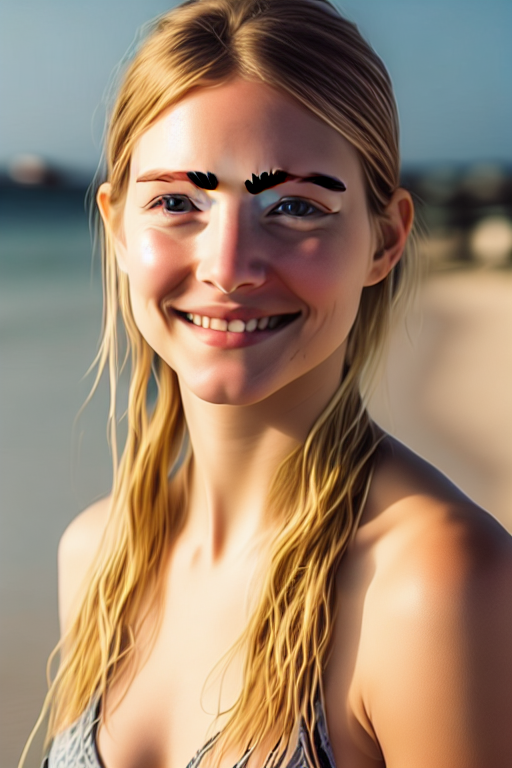

  0%|          | 0/30 [00:00<?, ?it/s]

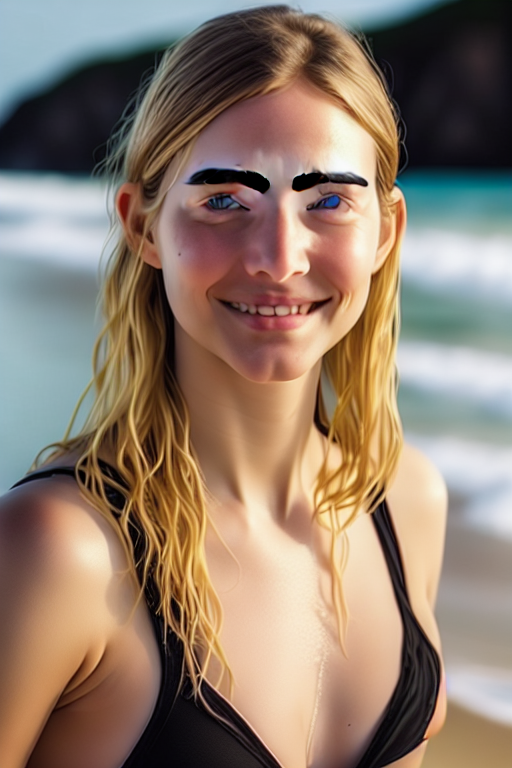

  0%|          | 0/30 [00:00<?, ?it/s]

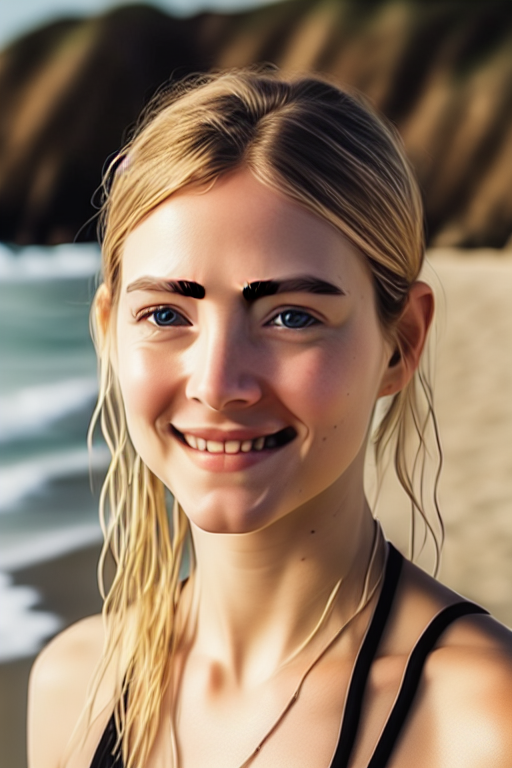

  0%|          | 0/30 [00:00<?, ?it/s]

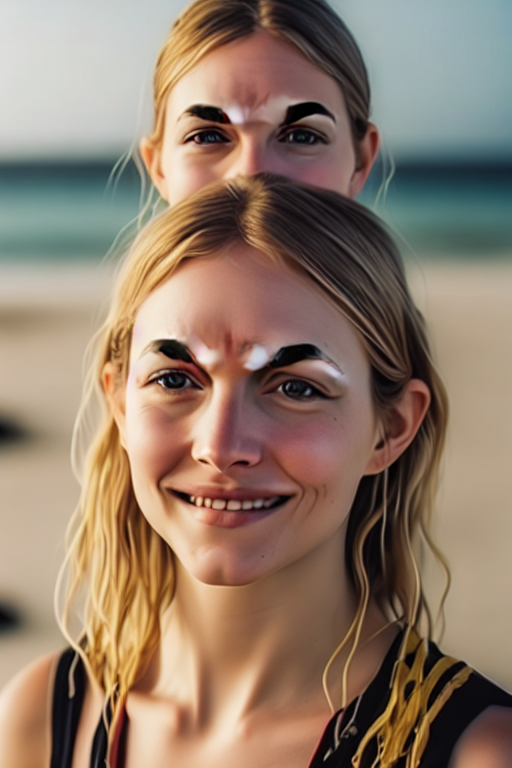

✅ Generation complete. Images saved to /content/ip_adapter_output


In [ ]:
# ✅ 7. Generate images using reference face
prompt = "a photo of sksbbx beachybeach who is fair skinned smiling on the beach with think black eyebrows"
negative_prompt = "blurry, distorted, low resolution, sunglasses"
images = []

for i in range(4):
    image = ip_adapter.generate(
        prompt=prompt,
        negative_prompt=negative_prompt,
        faceid_embeds=faceid_embeds,
        num_samples=1,
        width=512,
        height=768,
        num_inference_steps=30,
        seed=i
    )
    image = image[0] if isinstance(image, list) else image
    images.append(image)
    display(image)
    os.makedirs("/content/ip_adapter_output", exist_ok=True)
    image.save(f"/content/ip_adapter_output/beachybeach_ip_{i}.png")

print("✅ Generation complete. Images saved to /content/ip_adapter_output")